In [2]:
import pandas as pd
import numpy as np
groceries  = pd.read_csv("https://raw.githubusercontent.com/rahulsengupta/BasketAnalysis_Groceries/master/groceries.csv", sep=";", names=['Transaction'])
groceries

,Transaction
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [3]:
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder


# get all the transcactions as a list
transcactions = list(groceries['Transaction'].apply(lambda x: sorted(x.split(','))))


# instantiate transcation encoder
encoder = TransactionEncoder().fit(transcactions)

onehot = encoder.transform(transcactions)

# convert one-hot encode data to DataFrame
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
# compute frequent items using the Apriori algorithm - Get up to three items
frequent_itemsets = apriori(onehot, min_support = 0.001, max_len = 3, use_colnames=True)

In [4]:
# compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
9813,"(red/blush wine, bottled beer)",(liquor),0.004881,0.011083,0.001932,0.395833,35.715787,0.001878,1.636828,2
5436,"(soda, hamburger meat)",(Instant food products),0.005796,0.008033,0.001220,0.210526,26.209194,0.001174,1.256492,2
34592,"(ham, white bread)",(processed cheese),0.005084,0.016573,0.001932,0.380000,22.928221,0.001848,1.586172,2
9814,"(liquor, bottled beer)",(red/blush wine),0.004677,0.019217,0.001932,0.413043,21.493559,0.001842,1.670963,2
5434,"(Instant food products, soda)",(hamburger meat),0.001932,0.033249,0.001220,0.631579,18.995654,0.001156,2.624040,2


In [5]:
# Import seaborn under its standard alias
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

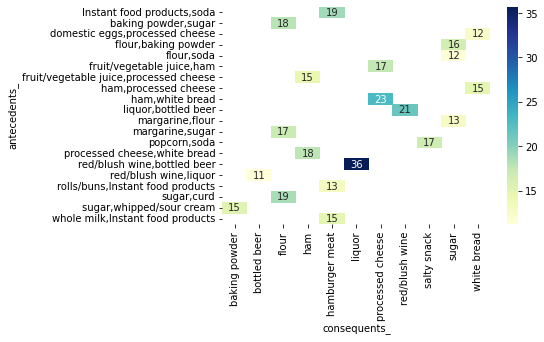

In [7]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[(rules['lhs items']>1) & (rules['lift']>=11) & (rules['confidence']>0.25)].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [14]:
rules_1=  rules[rules['antecedents_'].str.contains("beer") | rules['consequents_'].str.contains("beer")]
rules_1.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
9816,(liquor),"(red/blush wine, bottled beer)",0.011083,0.004881,0.001932,0.174312,35.715787,0.001878,1.205200,1,liquor,"red/blush wine,bottled beer"
9813,"(red/blush wine, bottled beer)",(liquor),0.004881,0.011083,0.001932,0.395833,35.715787,0.001878,1.636828,2,"red/blush wine,bottled beer",liquor
9815,(red/blush wine),"(liquor, bottled beer)",0.019217,0.004677,0.001932,0.100529,21.493559,0.001842,1.106565,1,red/blush wine,"liquor,bottled beer"
9814,"(liquor, bottled beer)",(red/blush wine),0.004677,0.019217,0.001932,0.413043,21.493559,0.001842,1.670963,2,"liquor,bottled beer",red/blush wine
9817,(bottled beer),"(red/blush wine, liquor)",0.080529,0.002135,0.001932,0.023990,11.235269,0.001760,1.022392,1,bottled beer,"red/blush wine,liquor"
...,...,...,...,...,...,...,...,...,...,...,...,...
572,(bottled beer),(dishes),0.080529,0.017590,0.001423,0.017677,1.004919,0.000007,1.000088,1,bottled beer,dishes
10299,(bottled beer),"(whipped/sour cream, tropical fruit)",0.080529,0.013828,0.001118,0.013889,1.004391,0.000005,1.000062,1,bottled beer,"whipped/sour cream,tropical fruit"
10294,"(whipped/sour cream, tropical fruit)",(bottled beer),0.013828,0.080529,0.001118,0.080882,1.004391,0.000005,1.000385,2,"whipped/sour cream,tropical fruit",bottled beer
18534,(pastry),"(canned beer, shopping bags)",0.088968,0.011388,0.001017,0.011429,1.003571,0.000004,1.000041,1,pastry,"canned beer,shopping bags"


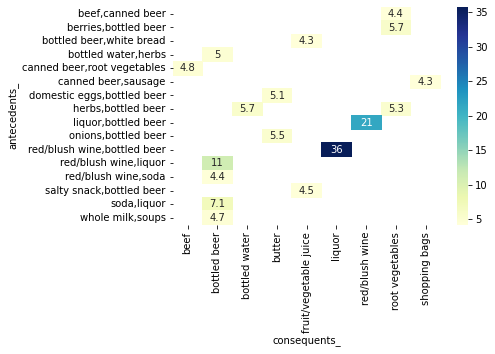

In [19]:
pivot_1 = rules_1[(rules_1['lhs items']>1)  & (rules_1['lift']>4.2) & (rules_1['confidence']>0.2)   ].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot_1, annot = True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [15]:
rules_2=  rules[rules['antecedents_'].str.contains("hamburger") | rules['consequents_'].str.contains("hamburger")]
rules_2.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
5436,"(soda, hamburger meat)",(Instant food products),0.005796,0.008033,0.001220,0.210526,26.209194,0.001174,1.256492,2,"soda,hamburger meat",Instant food products
5437,(Instant food products),"(soda, hamburger meat)",0.008033,0.005796,0.001220,0.151899,26.209194,0.001174,1.172271,1,Instant food products,"soda,hamburger meat"
5434,"(Instant food products, soda)",(hamburger meat),0.001932,0.033249,0.001220,0.631579,18.995654,0.001156,2.624040,2,"Instant food products,soda",hamburger meat
5439,(hamburger meat),"(Instant food products, soda)",0.033249,0.001932,0.001220,0.036697,18.995654,0.001156,1.036090,1,hamburger meat,"Instant food products,soda"
5445,(hamburger meat),"(whole milk, Instant food products)",0.033249,0.003050,0.001525,0.045872,15.038226,0.001424,1.044880,1,hamburger meat,"whole milk,Instant food products"
...,...,...,...,...,...,...,...,...,...,...,...,...
35098,"(rolls/buns, soda)",(hamburger meat),0.038332,0.033249,0.001322,0.034483,1.037119,0.000047,1.001278,2,"rolls/buns,soda",hamburger meat
3630,(hamburger meat),(newspapers),0.033249,0.079817,0.002745,0.082569,1.034477,0.000091,1.002999,1,hamburger meat,newspapers
3631,(newspapers),(hamburger meat),0.079817,0.033249,0.002745,0.034395,1.034477,0.000091,1.001187,1,newspapers,hamburger meat
35129,(soda),"(hamburger meat, root vegetables)",0.174377,0.006202,0.001118,0.006414,1.034125,0.000037,1.000213,1,soda,"hamburger meat,root vegetables"


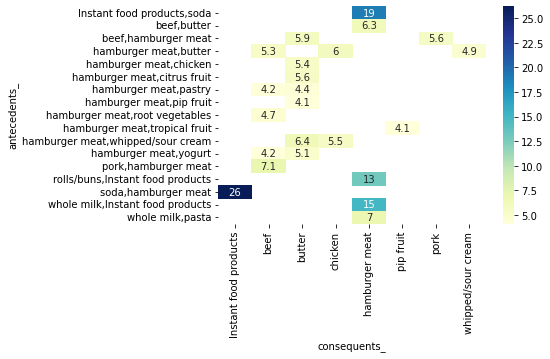

In [11]:
pivot_2 = rules_2[(rules_2['lhs items']>1)  & (rules_2['lift']>4) & (rules_2['confidence']>0.2)  ].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot_2, annot = True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [16]:
rules_3=  rules[rules['antecedents_'].str.contains("cat food") | rules['consequents_'].str.contains("cat food")]
rules_3.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
18859,(cat food),"(chocolate, yogurt)",0.023284,0.009253,0.001423,0.061135,6.607323,0.001208,1.055261,1,cat food,"chocolate,yogurt"
18854,"(chocolate, yogurt)",(cat food),0.009253,0.023284,0.001423,0.153846,6.607323,0.001208,1.154301,2,"chocolate,yogurt",cat food
10692,"(bottled water, napkins)",(cat food),0.008643,0.023284,0.001220,0.141176,6.063190,0.001019,1.137272,2,"bottled water,napkins",cat food
10697,(cat food),"(bottled water, napkins)",0.023284,0.008643,0.001220,0.052402,6.063190,0.001019,1.046179,1,cat food,"bottled water,napkins"
1539,(cat food),(pet care),0.023284,0.009456,0.001322,0.056769,6.003428,0.001102,1.050160,1,cat food,pet care
...,...,...,...,...,...,...,...,...,...,...,...,...
19127,(rolls/buns),"(yogurt, cat food)",0.183935,0.006202,0.001220,0.006633,1.069516,0.000079,1.000434,1,rolls/buns,"yogurt,cat food"
19121,(rolls/buns),"(whole milk, cat food)",0.183935,0.008846,0.001729,0.009397,1.062345,0.000101,1.000557,1,rolls/buns,"whole milk,cat food"
19120,"(whole milk, cat food)",(rolls/buns),0.008846,0.183935,0.001729,0.195402,1.062345,0.000101,1.014252,2,"whole milk,cat food",rolls/buns
19018,"(cat food, other vegetables)",(rolls/buns),0.006507,0.183935,0.001220,0.187500,1.019382,0.000023,1.004388,2,"cat food,other vegetables",rolls/buns


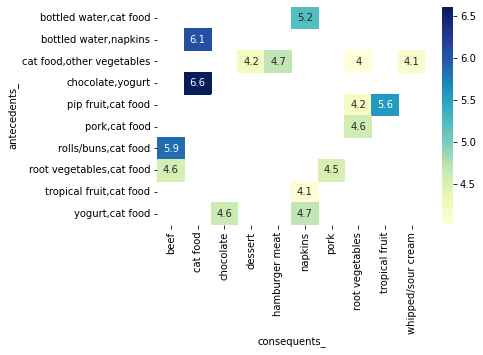

In [18]:
pivot_3 = rules_3[(rules_3['lhs items']>1)  & (rules_3['lift']>4) & (rules_3['confidence']>0.14)   ].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot_3, annot = True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()